In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import matplotlib.pyplot as plt
from calendar import monthrange

# Individual

In [2]:
direc = '/g/data1a/w40/ab2313/ACCESS_S_ens/e01_1st/'

file = xr.open_dataset(direc + 'daq5_pr_20121201_e01.nc_025_Aus.nc')


In [3]:
file

<xarray.Dataset>
Dimensions:    (latitude: 139, longitude: 178, time: 217)
Coordinates:
  * longitude  (longitude) float32 112.0 112.25 112.5 ... 155.75 156.0 156.25
  * latitude   (latitude) float32 -44.5 -44.25 -44.0 ... -10.5 -10.25 -10.0
  * time       (time) datetime64[ns] 2012-12-01T12:00:00 ... 2013-07-05T12:00:00
Data variables:
    pr         (time, latitude, longitude) float32 ...
Attributes:
    CDI:                     Climate Data Interface version 1.8.0 (http://mpi...
    Conventions:             CF-1.6
    history:                 Mon Apr 08 14:31:41 2019: cdo ifthen precip_cali...
    source:                  ACCESS-S1
    institution:             Australian Bureau of Meteorology
    acknowledgement:         Australian Bureau of Meteorology, Commonwealth o...
    author:                  Bureau of Meteorology
    copyright:               (C) Copyright Commonwealth of Australia (2017), ...
    creator_email:           poama@bom.gov.au
    creator_name:            Bureau 

In [4]:
file.time.values

array(['2012-12-01T12:00:00.000000000', '2012-12-02T12:00:00.000000000',
       '2012-12-03T12:00:00.000000000', '2012-12-04T12:00:00.000000000',
       '2012-12-05T12:00:00.000000000', '2012-12-06T12:00:00.000000000',
       '2012-12-07T12:00:00.000000000', '2012-12-08T12:00:00.000000000',
       '2012-12-09T12:00:00.000000000', '2012-12-10T12:00:00.000000000',
       '2012-12-11T12:00:00.000000000', '2012-12-12T12:00:00.000000000',
       '2012-12-13T12:00:00.000000000', '2012-12-14T12:00:00.000000000',
       '2012-12-15T12:00:00.000000000', '2012-12-16T12:00:00.000000000',
       '2012-12-17T12:00:00.000000000', '2012-12-18T12:00:00.000000000',
       '2012-12-19T12:00:00.000000000', '2012-12-20T12:00:00.000000000',
       '2012-12-21T12:00:00.000000000', '2012-12-22T12:00:00.000000000',
       '2012-12-23T12:00:00.000000000', '2012-12-24T12:00:00.000000000',
       '2012-12-25T12:00:00.000000000', '2012-12-26T12:00:00.000000000',
       '2012-12-27T12:00:00.000000000', '2012-12-28

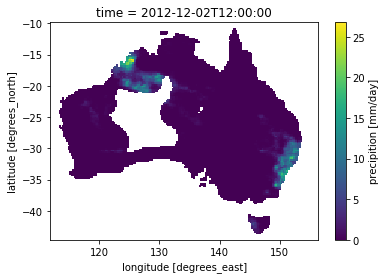

In [5]:
fig = plt.figure()

file.isel(time = 1).pr.plot()

# Multiple For Loop (Final Product)

In [6]:
ensemble_members = ['e01_1st',  'e03_1st',  'e05_1st',  'e07_1st',  'e09_1st' , 'e11_1st ',     
'e02_1st' , 'e04_1st' , 'e06_1st' , 'e08_1st' , 'e10_1st' ]


In [7]:
'''Steps:
0. There are 12 different ensemble members that need to be looped through
1. Opening the names of all the files
2. Looping through all of the names and then reading the file in
3. Each of the runs is 7 months long, and they happen for each month. So there is no over
    lap I am just getting the first month from each run
4. Combing into 1 file'''

access_stor = []


for ensemble_number, ensemble in enumerate(ensemble_members):

    
    directory = '/g/data1a/w40/ab2313/ACCESS_S_ens/' + ensemble + '/'

    '''1. Name of all the file in the directory'''
    file_list = glob.glob(directory + '*Aus.nc')


    '''2. Looping through all of the individual files'''
    for i,file in enumerate(file_list):

        one_file = xr.open_dataset(file)

        '''3. The number of days in each month, then slicing'''
        month = int(one_file.time.values[0].astype('str').split('-')[1])
        year = int(one_file.time.values[0].astype('str').split('-')[0])
        num_days = monthrange(year, month)[1]


        one_file = one_file.isel(time = slice(0, num_days))

        '''4. Combining into 1 file'''
        if i == 0:
            access = one_file
        else:
            access = access.combine_first(one_file)
        
#         # Renaming the dimension after the ensemble member
#         access = access.rename({'pr': ensemble.split('_')[0]})
        
    access_stor.append(access)
    
'''The Final Product'''

access = xr.concat(access_stor, pd.Index(np.arange(1, ensemble_number + 2), name = 'ensemble'))

In [8]:
len(access_stor)

11

In [11]:
# import os
# statinfo = os.stat('access.nc')
# print('access is ' + str(np.round(statinfo.st_size * 10 ** -9,2)) + 'GB')

<font size = "+2" color = "green"> Note: The access file is not saving as one piece. Therefore I am going to save a new netcdf for each ensemble</font>

<font size = "+0"> The files are saved in the /g/data/... directory </font>

In [12]:
save_directory = '/g/data/w40/ab2313/ACCESS_S_1ST_1M_ensembles/'

In [15]:

for ensemble_num, esemble_data in enumerate(access_stor,1):
    '''Selecting single ensemble member'''
    
    if ensemble_num < 10:
        name = 'e0' + str(ensemble_num)
    else:
        name = 'e' + str(ensemble_num)
    print(name)
    
    esemble_data.to_netcdf(save_directory  + name + '.nc')
    
    
    

e01
e02
e03
e04
e05
e06
e07
e08
e09
e10
e11


In [16]:
# This is creating an information file in the directory

text = ('The files in this folder are the ensemble member of ACCESS-S. There are 11 ensemble memebers and they'
       +' are run for 1 month after the start date. In the future there will be the second month after'
        + 'initilisation')